In [8]:
from __future__ import absolute_import, division, print_function

import numpy as np
import PIL.Image
from model.tetris import Tetris
from model.board import Board


import base64
import imageio
import IPython
import pyvirtualdisplay
import reverb

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import py_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common


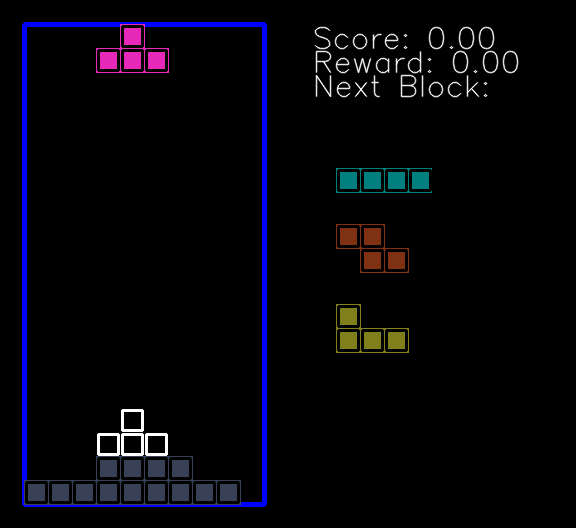

In [9]:
# GAME SETTING
BOARD_SIZE_W, BOARD_SIZE_H = BOARD = (10, 20)

# SCREEN SETTING
BLOCK_SIZE_W, BLOCK_SIZE_H = BLOCK_SIZE = (24, 24)
PADDING_X, PADDING_Y = PADDING = (24, 24)
WINDOW_SIZE_W, WINDOW_SIZE_H = WINDOW_SIZE = (PADDING_X * 2 + BOARD_SIZE_W * BLOCK_SIZE_W, PADDING_Y * 2 + BOARD_SIZE_H * BLOCK_SIZE_H)
env = Tetris(WINDOW_SIZE, PADDING, BOARD, BLOCK_SIZE)
PIL.Image.fromarray(env.render())

ret: (False, 0.01, array([ 0,  0, 17, 16, 16,  0,  0,  0,  0,  0,  1,  1, 19, 20, 19,  2,  2,
        1,  1,  0,  2,  0,  2,  0], dtype=int32))


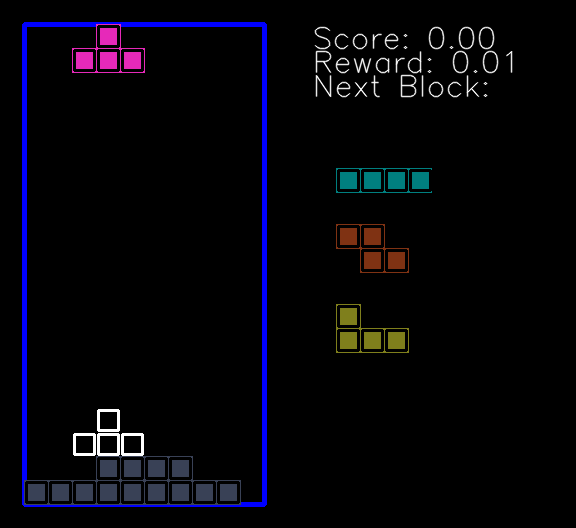

In [10]:
ret = env.board.take_action(0)
print(f'ret: {ret}')
PIL.Image.fromarray(env.render())

In [11]:
env.board.state

array([ 0,  0, 17, 16, 16,  0,  0,  0,  0,  0,  1,  1, 19, 20, 19,  2,  2,
        1,  1,  0,  2,  0,  2,  0], dtype=int32)

In [12]:
# raise Exception('STOP!')

In [13]:
num_iterations = 10_000 # @param {type:"integer"}

collect_steps_per_iteration = 50 # @param {type:"integer"}
replay_buffer_max_length = 1_000_000  # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-4  # @param {type:"number"}
log_interval = 1000  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

In [14]:
from tf_agents.environments import utils

utils.validate_py_environment(env, episodes=20)

In [15]:
# train_env = tf_py_environment.TFPyEnvironment(env)
# eval_env = tf_py_environment.TFPyEnvironment(env)

In [16]:
# from tf_agents.environments.batched_py_environment import BatchedPyEnvironment

# train_env = BatchedPyEnvironment(envs=[Tetris() for _ in range(8)])
# eval_env = BatchedPyEnvironment(envs=[Tetris() for _ in range(8)])

In [17]:
from tf_agents.environments import parallel_py_environment

In [ ]:
from tf_agents.mu

In [26]:
from tf_agents.environments import parallel_py_environment

parallel_py_environment.ParallelPyEnvironment(
    [Tetris, Tetris], 
    start_serially=False,
    blocking=True
)
# train_env = tf_py_environment.TFPyEnvironment(
#     ParallelPyEnvironment(
#         [Tetris] * 2
#     )
# )

RuntimeError: Unable to load multiprocessing context.

Please ensure that you properly initialize your program by wrapping your main()
call:

def main(argv):
  ...

if __name__ == '__main__':
  tf_agents.system.multiprocessing.handle_main(main, extra_state_savers=...)

or, if using absl.app:

if __name__ == '__main__':
  tf_agents.system.multiprocessing.handle_main(
      functools.partial(absl.app.run, main), extra_state_savers=...)


For unit tests, this also means wrapping your test.main using handle_test_main:

if __name__ == '__main__':
  tf_agents.system.multiprocessing.handle_test_main(
      tf.test.main, extra_state_savers=...)

or

if __name__ == '__main__':
  tf_agents.system.multiprocessing.handle_test_main(
      tf_agents.utils.test_utils.main, extra_state_savers=...)

If you are in interactive mode (e.g. python console, ipython, jupyter notebook)
use:

tf_agents.system.multiprocessing.enable_interactive_mode(
    extra_state_savers=...)

For more details on state savers, see the docstrings for
`tf_agents.multiprocessing.handle_*` and:

https://pythonspeed.com/articles/python-multiprocessing/

  In call to configurable 'ParallelPyEnvironment' (<class 'tf_agents.environments.parallel_py_environment.ParallelPyEnvironment'>)

In [28]:
train_env = tf_py_environment.TFPyEnvironment(
    ParallelPyEnvironment(
        [Tetris] * 4
    )
)

RuntimeError: Unable to load multiprocessing context.

Please ensure that you properly initialize your program by wrapping your main()
call:

def main(argv):
  ...

if __name__ == '__main__':
  tf_agents.system.multiprocessing.handle_main(main, extra_state_savers=...)

or, if using absl.app:

if __name__ == '__main__':
  tf_agents.system.multiprocessing.handle_main(
      functools.partial(absl.app.run, main), extra_state_savers=...)


For unit tests, this also means wrapping your test.main using handle_test_main:

if __name__ == '__main__':
  tf_agents.system.multiprocessing.handle_test_main(
      tf.test.main, extra_state_savers=...)

or

if __name__ == '__main__':
  tf_agents.system.multiprocessing.handle_test_main(
      tf_agents.utils.test_utils.main, extra_state_savers=...)

If you are in interactive mode (e.g. python console, ipython, jupyter notebook)
use:

tf_agents.system.multiprocessing.enable_interactive_mode(
    extra_state_savers=...)

For more details on state savers, see the docstrings for
`tf_agents.multiprocessing.handle_*` and:

https://pythonspeed.com/articles/python-multiprocessing/

  In call to configurable 'ParallelPyEnvironment' (<class 'tf_agents.environments.parallel_py_environment.ParallelPyEnvironment'>)

In [ ]:
# ParallelPyEnvironment([Tetris for i in range(8)])

In [ ]:
# train_env = tf_py_environment.TFPyEnvironment(ParallelPyEnvironment([Tetris]))
# tf_py_environment.TFPyEnvironment(ParallelPyEnvironment([Tetris(WINDOW_SIZE, PADDING, BOARD, BLOCK_SIZE)]*int(8)))
# tf_py_environment.TFPyEnvironment(ParallelPyEnvironment([Tetris]*int(8)))

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

def create_policy_eval_video(policy, filename, num_episodes=5, fps=15):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(env.render())
  return embed_mp4(filename)

In [ ]:
fc_layer_params = (256, 256, 128, 128, 16)
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

# Define a helper function to create Dense layers configured with the right
# activation and kernel initializer.
def dense_layer(num_units):
    return tf.keras.layers.Dense(
        num_units,
        activation=tf.keras.activations.elu,
        # kernel_initializer=tf.keras.initializers.VarianceScaling(scale=2.0, mode='fan_in', distribution='truncated_normal'),
        kernel_initializer=tf.keras.initializers.he_normal,# tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None),
        bias_initializer=tf.keras.initializers.he_normal, #tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None),
    )

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# its output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    # activation=tf.keras.activations.,
    activation=None,
    # kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.03, maxval=0.03),
    # bias_initializer=tf.keras.initializers.Constant(-0.2)
    kernel_initializer=tf.keras.initializers.he_normal, #tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None),
    bias_initializer=tf.keras.initializers.he_normal, #tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5, seed=None),
)
q_net = sequential.Sequential(dense_layers + [q_values_layer])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter
)

agent.initialize()


TypeError: Spec type not supported: 'BoundedArraySpec(shape=(24,), dtype=dtype('int32'), name='board', minimum=-2, maximum=20)'
  In call to configurable 'DqnAgent' (<class 'tf_agents.agents.dqn.dqn_agent.DqnAgent'>)

In [ ]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

In [ ]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

In [ ]:
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# See also the metrics module for standard implementations of different metrics.
# https://github.com/tensorflow/agents/tree/master/tf_agents/metrics

In [ ]:
compute_avg_return(eval_env, random_policy, num_eval_episodes)

0.99757016

In [ ]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
    replay_buffer_signature)

table = reverb.Table(
    table_name,
    max_size=replay_buffer_max_length,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    agent.collect_data_spec,
    table_name=table_name,
    sequence_length=2,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
  replay_buffer.py_client,
  table_name,
  sequence_length=2)

[reverb/cc/platform/tfrecord_checkpointer.cc:162]  Initializing TFRecordCheckpointer in /tmp/tmpdldb8ivt.
[reverb/cc/platform/tfrecord_checkpointer.cc:567] Loading latest checkpoint from /tmp/tmpdldb8ivt
[reverb/cc/platform/default/server.cc:71] Started replay server on port 43995


In [ ]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=8,
    sample_batch_size=batch_size,
    num_steps=2
).prefetch(8)

dataset

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


<PrefetchDataset element_spec=(Trajectory(
{'action': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'discount': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None),
 'next_step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'observation': TensorSpec(shape=(64, 2, 24), dtype=tf.int32, name=None),
 'policy_info': (),
 'reward': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None),
 'step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None)}), SampleInfo(key=TensorSpec(shape=(64, 2), dtype=tf.uint64, name=None), probability=TensorSpec(shape=(64, 2), dtype=tf.float64, name=None), table_size=TensorSpec(shape=(64, 2), dtype=tf.int64, name=None), priority=TensorSpec(shape=(64, 2), dtype=tf.float64, name=None), times_sampled=TensorSpec(shape=(64, 2), dtype=tf.int32, name=None)))>

In [ ]:
# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step.
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

# Reset the environment.
time_step = env.reset()

# Create a driver to collect experience.
collect_driver = py_driver.PyDriver(
  env,
  py_tf_eager_policy.PyTFEagerPolicy(agent.collect_policy, use_tf_function=True),
  [rb_observer],
  max_steps=collect_steps_per_iteration,
  max_episodes=1
)

num_iterations = 200_000
iterator = iter(dataset)
for _ in range(num_iterations):

  # Collect a few steps and save to the replay buffer.
  time_step, _ = collect_driver.run(time_step)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (221371) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (221371) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (221371) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (221371) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (221371) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (221371) so Table uniform_table is accessed directly without gRPC.


step = 1000: loss = 2.3566999435424805
step = 1000: Average Return = 0.5597865581512451
step = 2000: loss = 3.199174642562866
step = 2000: Average Return = 0.7560324668884277
step = 3000: loss = 3.5225882530212402
step = 3000: Average Return = 0.9527866244316101
step = 4000: loss = 7.441551208496094
step = 4000: Average Return = 0.850691020488739
step = 5000: loss = 1.3178892135620117
step = 5000: Average Return = 0.19770729541778564
step = 6000: loss = 1.3479175567626953
step = 6000: Average Return = 0.4571198523044586
step = 7000: loss = 1.3693656921386719
step = 7000: Average Return = 0.600619912147522
step = 8000: loss = 0.9979971647262573
step = 8000: Average Return = 0.13987396657466888
step = 9000: loss = 1.4152655601501465
step = 9000: Average Return = 0.1162073016166687
step = 10000: loss = 0.9566137790679932
step = 10000: Average Return = 0.9244369268417358
step = 11000: loss = 0.743232250213623
step = 11000: Average Return = 0.8336992263793945
step = 12000: loss = 2.61986279

KeyboardInterrupt: 

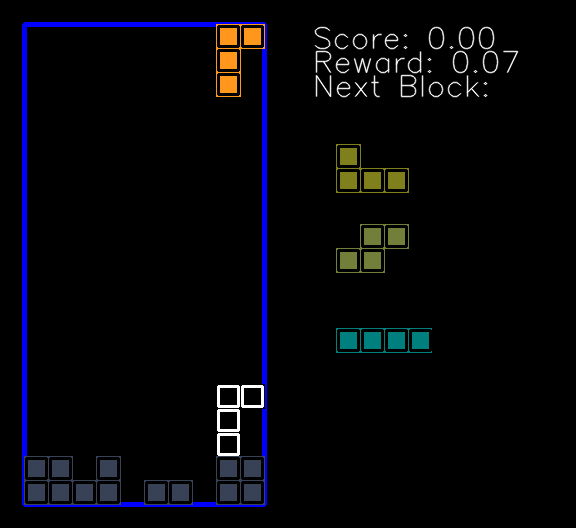

In [ ]:
PIL.Image.fromarray(env.render())

In [ ]:
# iterations = range(0, num_iterations + 1, eval_interval)
# plt.plot(iterations, returns)
# plt.ylabel('Average Return')
# plt.xlabel('Iterations')
# plt.ylim(top=250)

In [ ]:
create_policy_eval_video(agent.policy, "trained-agent", fps=10)

In [ ]:
create_policy_eval_video(random_policy, "random-agent")